# [Pandas Visualisierungen] Weitere Visualisierungstypen

In [1]:
import pandas as pd
import seaborn as sb

In [2]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### glue-Datensatz

**General Language Understanding Evaluation**

- Natural Language Understanding

- Plattform zur Bewertung und Analyse von NLP- und NLU-Modellen

In [3]:
glue = sb.load_dataset("glue")
glue

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


### Sprachverständnisaufgaben

In [17]:
glue.Task.unique()

array(['CoLA', 'SST-2', 'MRPC', 'STS-B', 'QQP', 'MNLI', 'QNLI', 'RTE'],
      dtype=object)

1. CoLA (Corpus of Linguistic Acceptability)
2. MRPC (Microsoft Research Paraphrase Corpus)
3. SST-2 (Stanford Sentiment Treebank)
4. QQP (Quora Question Pairs)
5. STS-B (Semantic Textual Similarity Benchmark)
6. MNLI (Multi-Genre Natural Language Inference)
7. QNLI (Question NLI)
8. WNLI (Winograd NLI)
9. RTE (Recognizing Textual Entailment)

## 1. Linien- und Flächendiagramm

*Visualisiere den Score in einem Linien- und Flächendiagramm. Füge Diagrammbeschriftung und Achsenbeschriftungen hinzu. Verwende die Farbe "orange"*

<AxesSubplot:title={'center':'Liniendiagramm'}, xlabel='Verlauf', ylabel='Score'>

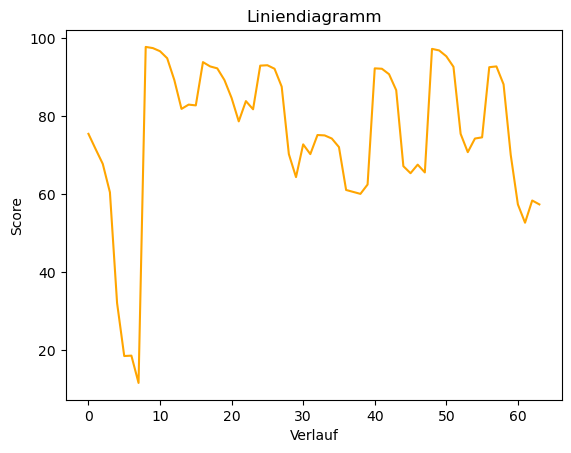

In [6]:
glue["Score"].plot(title="Liniendiagramm", xlabel="Verlauf", ylabel="Score", color="orange")

<AxesSubplot:title={'center':'Liniendiagramm'}, xlabel='Verlauf', ylabel='Score'>

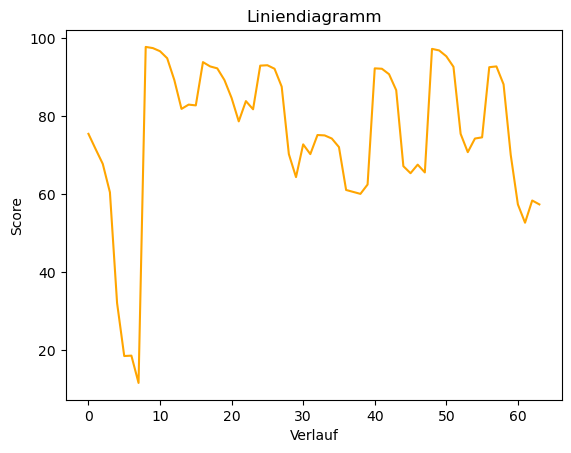

In [7]:
glue["Score"].plot.line(title="Liniendiagramm", xlabel="Verlauf", ylabel="Score", color="orange")

<AxesSubplot:title={'center':'Flächendiagramm'}, xlabel='Verlauf', ylabel='Score'>

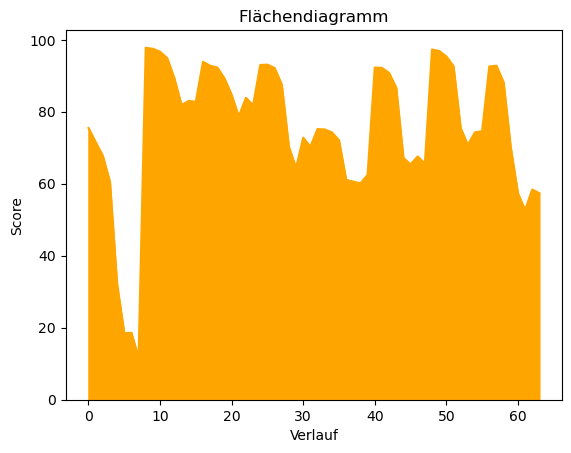

In [9]:
glue["Score"].plot.area(title="Flächendiagramm", xlabel="Verlauf", ylabel="Score", color="orange")

<AxesSubplot:title={'center':'Flächendiagramm'}, xlabel='Verlauf', ylabel='Score'>

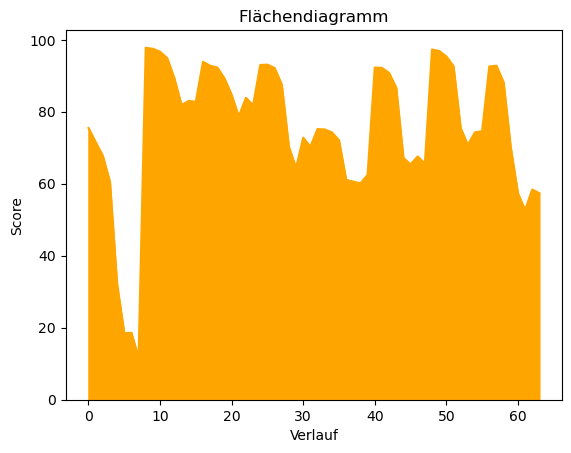

In [10]:
glue["Score"].plot(kind="area", title="Flächendiagramm", xlabel="Verlauf", ylabel="Score", color="orange")

## 2. Balkendiagramme

*Veranschauliche den Score nun in einem Balkendiagramm sortiert nach den einzelnen Jahren. Verwende die Farbe "dunkelblau"*

<AxesSubplot:xlabel='Year'>

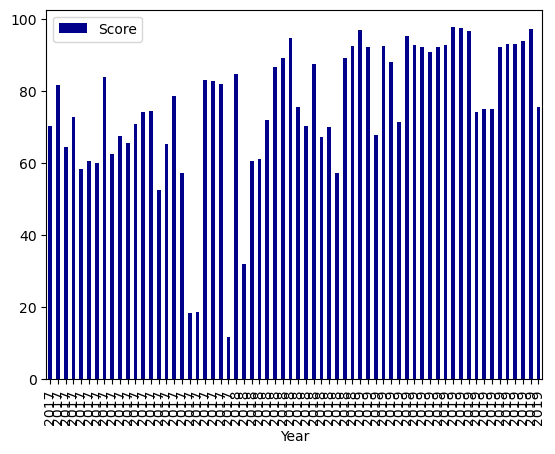

In [13]:
glue.sort_values(by="Year").plot.bar(x="Year", y="Score", color="darkblue")

<AxesSubplot:ylabel='Year'>

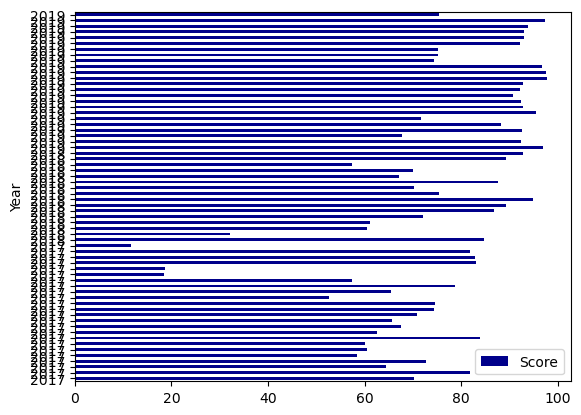

In [14]:
glue.sort_values(by="Year").plot(kind="barh", x="Year", y="Score", color="darkblue")

## 3. Boxplot

*Verwende nun einen Boxplot jeweils für den Score und aufgeteilt nach:*

- Model

- Year

- Encoder

array([<AxesSubplot:title={'center':'Score'}, xlabel='Model'>,
       <AxesSubplot:>], dtype=object)

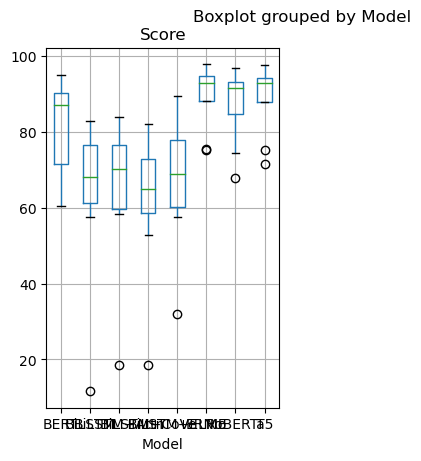

In [15]:
glue.boxplot(column=["Score"], by="Model", layout=(1,2))

array([<AxesSubplot:title={'center':'Score'}, xlabel='Year'>,
       <AxesSubplot:>], dtype=object)

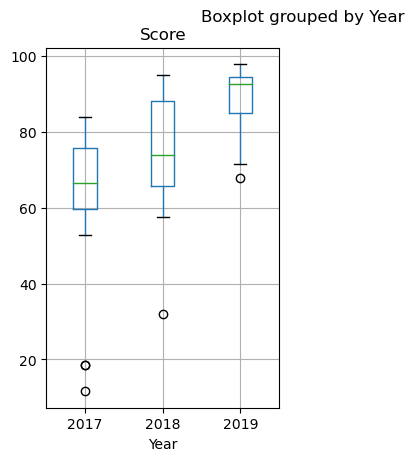

In [16]:
glue.boxplot(column=["Score"], by="Year", layout=(1,2))

array([<AxesSubplot:title={'center':'Score'}, xlabel='Encoder'>,
       <AxesSubplot:>], dtype=object)

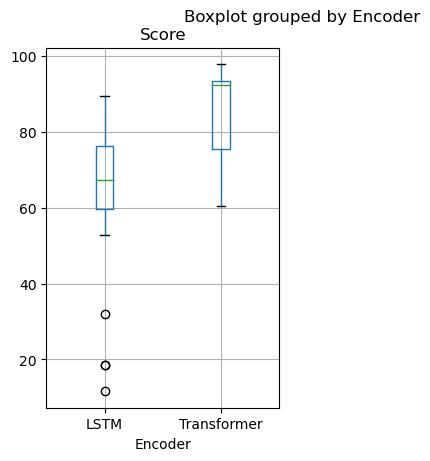

In [17]:
glue.boxplot(column=["Score"], by="Encoder", layout=(1,2))

## 4. Histogramm

*Veranschauliche den Score auch in einem Histogramm und setze den bins-Parameter auf 25*

*Zeichne zwei weitere Histogramme unterteilt nach Model und Year*

<AxesSubplot:title={'center':'Histogramm'}, xlabel='Score', ylabel='Häufigkeit'>

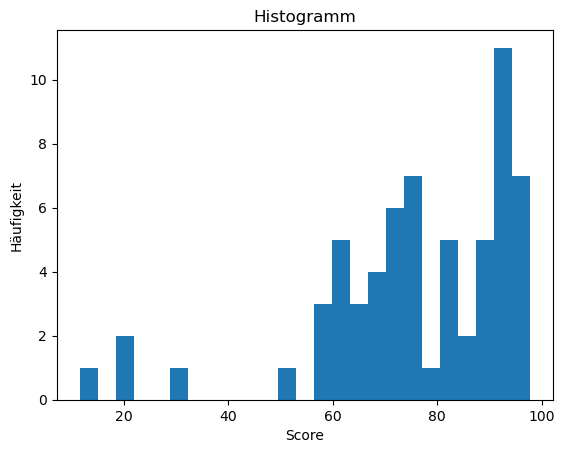

In [20]:
glue["Score"].plot(kind="hist", bins=25, title="Histogramm", xlabel="Score", ylabel="Häufigkeit")

array([[<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>, <AxesSubplot:>]],
      dtype=object)

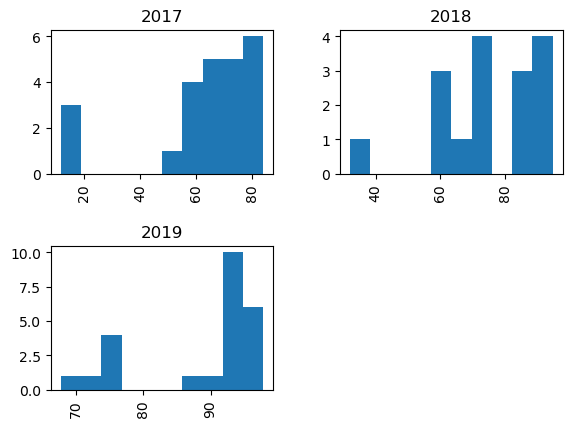

In [21]:
glue.hist(column="Score", by="Year")

array([[<AxesSubplot:title={'center':'BERT'}>,
        <AxesSubplot:title={'center':'BiLSTM'}>,
        <AxesSubplot:title={'center':'BiLSTM+Attn'}>],
       [<AxesSubplot:title={'center':'BiLSTM+CoVe'}>,
        <AxesSubplot:title={'center':'BiLSTM+ELMo'}>,
        <AxesSubplot:title={'center':'ERNIE'}>],
       [<AxesSubplot:title={'center':'RoBERTa'}>,
        <AxesSubplot:title={'center':'T5'}>, <AxesSubplot:>]],
      dtype=object)

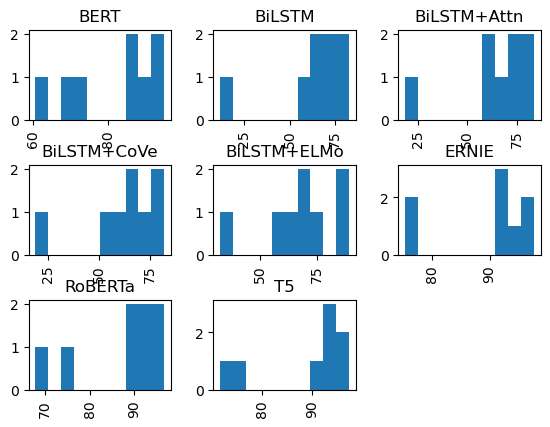

In [22]:
glue.hist(column="Score", by="Model")

## 5. Kuchendiagramm

*Verwende ein Kuchendiagramm, um den Score nach Models aufzugliedern*

array([<AxesSubplot:ylabel='Score'>], dtype=object)

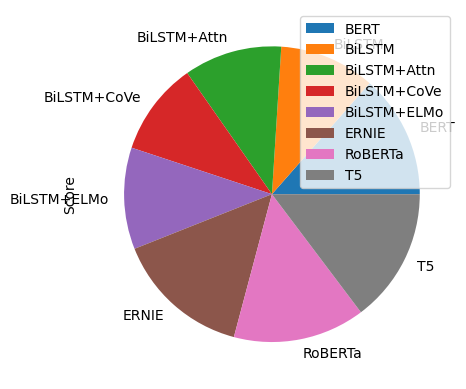

In [24]:
glue.groupby(by=["Model"]).sum().plot(kind="pie", subplots=True, y="Score")